In [43]:
import locale
import numpy as np
import pandas as pd
import geopandas as gpd

from pylab import cm                                                             
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.pyplot import figure

import figure_size
plt.style.use("/cosma/home/dp004/dc-beck3/1_CMB_Mirage/src/visual/publication.mplstyle")

In [41]:
flute_dir = "/cosma7/data/dp004/dc-beck3/FluTE/"

flute_id = pd.read_csv(
    flute_dir + "northeast_tracts",
    delimiter=',',
    delim_whitespace=False,
)

log = pd.read_csv(
    flute_dir + "northeast_log",
    delimiter=',',
    delim_whitespace=False,
    #dtype={'':int,'':str,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int},
)
#log = log.astype({'TractID': 'str'})
#log = log.groupby(["time"]).sum(axis=1)  # sum all areas to complete region (North East)

In [36]:
# dictionaries from FluTe to NOMIS
RGN17CD_df = pd.read_csv(
    flute_dir + "input_ew/RGN17CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
RGN17CD_df = RGN17CD_df.rename(columns={"Unnamed: 0": "nomis id"})
LAD11CD_df = pd.read_csv(
    flute_dir + "input_ew/LAD11CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
LAD11CD_df = LAD11CD_df.rename(columns={"Unnamed: 0": "nomis id"})
MSOA11CD_df = pd.read_csv(
    flute_dir + "input_ew/MSOA11CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
MSOA11CD_df = MSOA11CD_df.rename(columns={"Unnamed: 0": "nomis id"})

In [37]:
for flute_key in flute_id["TractID"].values:
    trans_key = flute_id[flute_id["TractID"] == flute_key]["FIPStract"].values[0]
    nomis_key = MSOA11CD_df[MSOA11CD_df["flute id"] == trans_key]["nomis id"].values[0]
    log["TractID"] = log["TractID"].replace(flute_key, nomis_key)

In [38]:
log

,time,TractID,sym0-4,sym5-18,sym19-29,sym30-64,sym65+,cumsym0-4,cumsym5-18,cumsym19-29,cumsym30-64,cumsym65+
0,0,E02002536,0,0,0,0,0,0,0,0,0,0
1,0,E02002537,0,0,0,0,0,0,0,0,0,0
2,0,E02002534,0,0,0,0,0,0,0,0,0,0
3,0,E02002535,0,0,0,0,0,0,0,0,0,0
4,0,E02002532,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61875,181,E02004348,0,0,0,0,0,307,1143,587,2011,461
61876,181,E02004349,0,0,0,0,0,349,1348,592,2267,562
61877,181,E02005724,0,0,0,0,0,250,929,451,1700,391
61878,181,E02005732,0,0,0,0,0,354,1279,638,2457,578


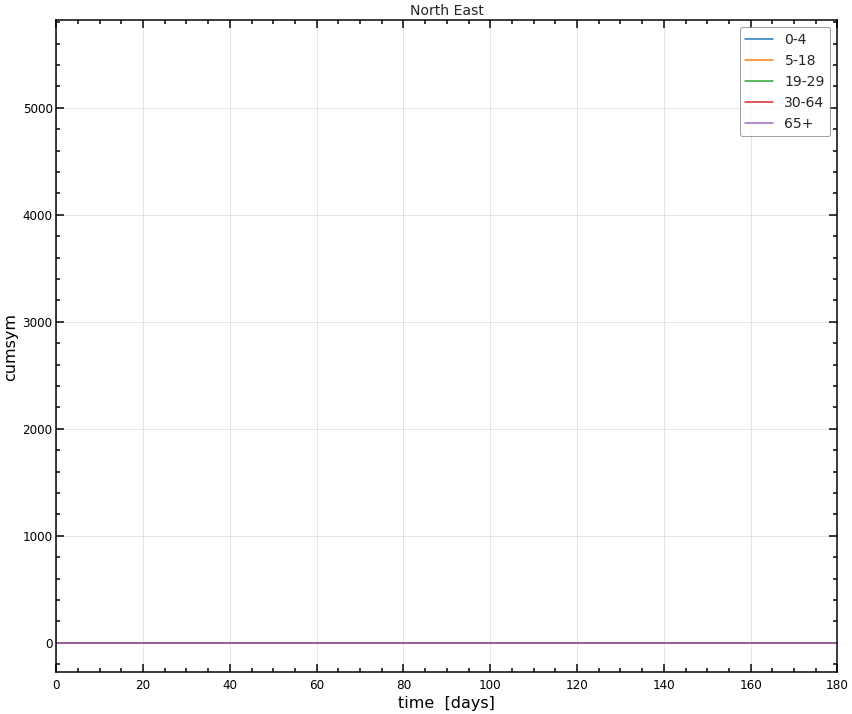

In [39]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 12),
    facecolor="w", edgecolor="k",
)

plt.plot(
    log.index.values,
    log["cumsym0-4"].values,
    label="0-4",
)
plt.plot(
    log.index.values,
    log["cumsym5-18"].values,
    label="5-18",
)
plt.plot(
    log.index.values,
    log["cumsym19-29"].values,
    label="19-29",
)
plt.plot(
    log.index.values,
    log["cumsym30-64"].values,
    label="30-64",
)
plt.plot(
    log.index.values,
    log["cumsym65+"].values,
    label="65+",
)

plt.xlim([0, 180])
plt.xlabel(r'time  [days]', fontsize=16)
plt.ylabel(r'cumsym', fontsize=16)
plt.title(r"North East")
plt.legend(loc='best')
plt.grid()

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


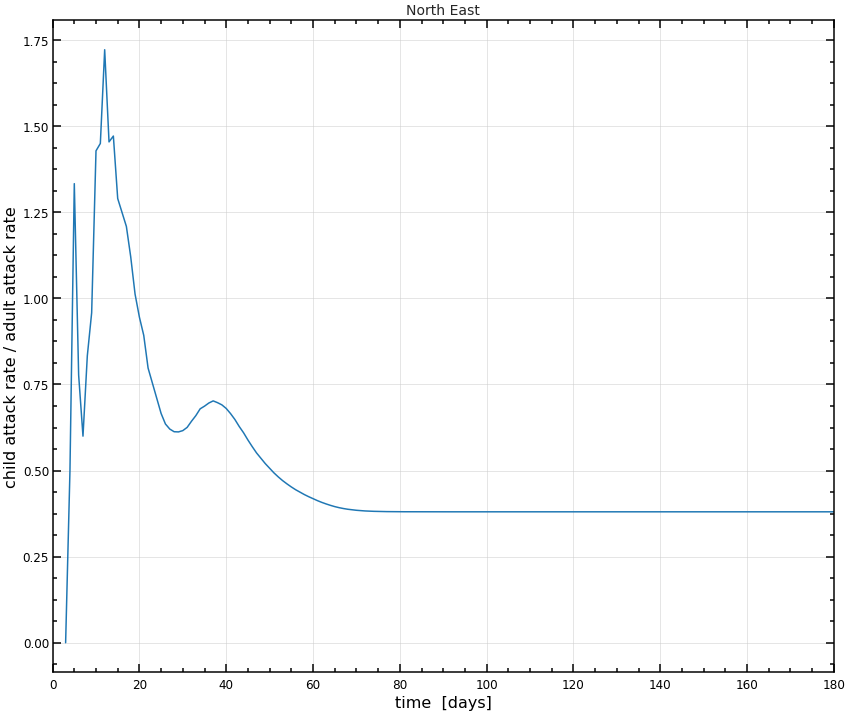

In [54]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 12),
    facecolor="w", edgecolor="k",
)

plt.plot(
    log.index.values,
    log["cumsym5-18"].values / \
    log[["cumsym19-29", "cumsym30-64", "cumsym65+"]].sum(axis=1).values,
)

plt.xlim([0, 180])
plt.xlabel(r'time  [days]', fontsize=16)
plt.ylabel(r'child attack rate / adult attack rate', fontsize=16)
plt.title(r"North East")
plt.grid()

In [6]:
dirs = "./Middle_Layer_Super_Output_Areas_December_2011_Full_Clipped_Boundaries_in_England_and_Wales/"
ew_shape = gpd.read_file(
    dirs+'Middle_Layer_Super_Output_Areas_December_2011_Full_Clipped_Boundaries_in_England_and_Wales.shp'
)
ew_shape = ew_shape.set_index('msoa11cd')

In [45]:
log = log[log["time"] == 181].set_index('TractID')
log["cumsym0-inf"] = log[["cumsym0-4","cumsym5-18","cumsym19-29","cumsym30-64","cumsym65+"]].sum(axis=1)

region_shape = ew_shape.merge(
    log[["time", "cumsym0-inf"]],
    left_index=True,
    right_index=True
)

In [46]:
# Convert to Lon. & Lat.
# https://gis.stackexchange.com/questions/302699/extracting-longitude-and-latitude-from-shapefile
test = region_shape.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326
durham = [54.7753, 1.5849]
newcastle_ut = [54.9783, 1.6178]

/cosma/home/dp004/dc-beck3/.local/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


TypeError: You must first set_array for mappable

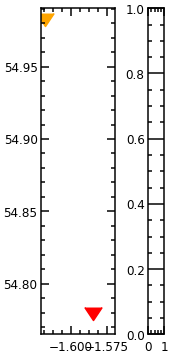

In [47]:
fig, ax = plt.subplots(
    figsize=(12, 6),
)

norm = colors.Normalize(vmin=log["cumsym0-inf"].values.min(), vmax=log["cumsym0-inf"].values.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

test.plot(
    column="cumsym0-inf",
    ax=ax,
    legend=True,
    cmap=cm.Blues,
    alpha=0.9,
    categorical=False,
)
plt.scatter(
    -1.5849, 54.7753,
    marker=7, #'+',
    s=300,
    c='red',
    label="Durham"
)
plt.scatter(
    -1.6178, 54.9783,
    marker=7,#'+',
    s=300,
    c='orange',
    label="Newcastle upon Tyne"
)

ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('I am a label')
plt.legend(loc='best')
plt.xlim([-2.0, -1.25])
plt.ylim([54.6, 55.2])

"""
# Convert axis ticks units from m to km
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [float(item)/1e3 for item in labels]
ax.set_xticklabels(labels)
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = [float(item)/1e3 for item in labels]
ax.set_yticklabels(labels)
plt.xlabel("x  [km]")
plt.xlabel("y  [km]")
"""
#cbar = fig.colorbar(choropleth, format='%.2f')
#cbar.set_label('# of symptomatic cases',size=14)